<a href="https://colab.research.google.com/github/AlejandroLopezDS/Academypublic/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
files.upload()
#create a kaggle folder
!mkdir ~/.kaggle
# Go on kaggle > Account > Create New API token
# Save the json file in your laptop in a dedicated folder
# copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json
# Datasets available here: 
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009
!unzip red-wine-quality-cortez-et-al-2009.zip

Saving kaggle.json to kaggle.json
  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 41.8MB/s]
Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [2]:
# Datasets available here: 
# https://www.kaggle.com/avikpaul4u/vehicle-loan-default-prediction
!kaggle datasets download -d avikpaul4u/vehicle-loan-default-prediction
!unzip vehicle-loan-default-prediction.zip

 43% 5.00M/11.6M [00:00<00:00, 47.3MB/s]
100% 11.6M/11.6M [00:00<00:00, 74.4MB/s]
Archive:  vehicle-loan-default-prediction.zip
  inflating: Data Dictionary.xlsx    
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd # Here I import a library named pandas which is specialized in
# data manipulation. I give an alias pd it is a kind of pseudonyme where pd refers to pandas.
import numpy as np
df = pd.read_csv('/content/winequality-red.csv')


In [24]:
def citric_acid_cat(x):
  if x < 0.21 :
    return 'A'
  elif x < 0.3 :
    return 'B'
  else:
    return 'C'

# Now we want to create a new feature citric_cat, which transform the numerical value
# of citric acid to the category defined above for each line of the feature.
# We could create a for loop. However the apply lambda is more efficient from a computing point of view 
# The x refers to the x of the function which is df['citric acid']
df['citric_cat2'] = df['citric acid'].apply(citric_acid_cat)


In [16]:
df['citric acid'].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [38]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric_cat,citric_cat2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,A,A
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,A,A
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,A,A
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,C,C
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,A,A
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,A,A
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,A,A
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,A,A


In [49]:
np.random.seed(1)

randomf1=pd.Series(np.random.normal(0,1,len(df)), name='Feature 1')

In [52]:
df.groupby('citric_cat')['quality'].mean()

citric_cat
A    5.462758
B    5.394636
C    5.879774
Name: quality, dtype: float64

In [57]:
df.groupby(['citric_cat', 'quality'])['sulphates', 'fixed acidity']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [61]:
pd.pivot_table(df, values='sulphates', index=['quality'])

,sulphates
quality,
3,0.570000
4,0.596415
5,0.620969
6,0.675329
7,0.741256
8,0.767778


In [64]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from  matplotlib.lines import Line2D
import matplotlib.dates as mdates
import seaborn as sns

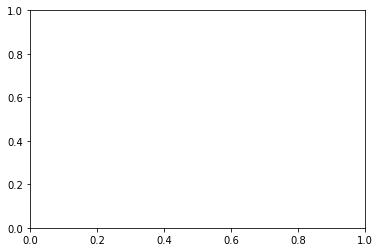

In [65]:
fig1, ax = plt.subplots()

ax.bar(x=df)

In [7]:
# Now let's complexify the database in order to have additional work to do later! Not important to understand
# Educational purpose

# Here I create a binary feature who will be used as target
# We use the numpy.where function which is equivalent to a if-then-else statement
# If df['quality'] >= 7 then df['Y']=1, else df['Y']=0
df['Y'] = np.where(df['quality']>= 7, 1, 0)

# We create as well some binary features of 'fixed acidity' & 'volatile acidity'
df['fixed_acidity_cat'] = np.where(df['fixed acidity']<= 8, 0, 1)
df['volatile_acidity_cat'] = np.where(df['volatile acidity']>= 0.4, 0, 1)

# Here I create some duplicates rows: I do a random sample of df and then I concat them at the end of df
temp = df.sample(n=150, random_state=893717398)
df = df.append(temp)
del(temp)
df.reset_index(drop=True, inplace=True)

# Here I create a new feature pH2 from pH where I had some missing values
df['pH2'] = np.where(df['pH'].index %15 ==0, np.nan, df['pH'])

# Here I create a new random feature 'acidity_other' from 'fixed acidity' and I create some missing values
rng = np.random.default_rng(893717398)
df = df.join(pd.Series(rng.normal(df['fixed acidity'].median(),1,len(df)), name='acidity_other'))
df['acidity_other'] = np.where(df['acidity_other'].index %2 !=0, np.nan, df['pH'])

#Here it is a function that will automatically create a feature of random dates between a defined interval
def random_datetimes_or_dates(start, end, out_format='datetime', n=10): 

    '''   
    unix timestamp is in ns by default. 
    I divide the unix time value by 10**9 to make it seconds 
    (or 24*60*60*10**9 to make it days).
    The corresponding unit variable is passed to 
    the pd.to_datetime function. 
    Values for the (divide_by, unit) pair to select is defined by 
    the out_format parameter.
    for 1 -> out_format='datetime'
    for 2 -> out_format=anything else
    '''
    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit)

# Now I apply my function in order to create the new feature 'date'
np.random.seed(893717398)
d_start = pd.to_datetime('2021-01-01')
d_end = pd.to_datetime('2021-06-30')
df['date'] = random_datetimes_or_dates(d_start, d_end, out_format='datetime', n=len(df))
df['date'] = df['date'].astype(str)

## End of the complexification


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
